### Week43 - Ex9
###### Data from: https://snap.stanford.edu/data/roadNet-CA.txt.gz

Via Docker
* A. Download data from https://snap.stanford.edu/data/roadNet-CA.txt.gz use of tqdm to show the installation is optional.
* B. Unzip the file.

* Print out the length of roadNet-CA.txt and find the Node ID '27'.
* A. Find the neighbours of 27 and print these out
* B. With this knowledge create a small Directed Graph of this data. For the neighbours that are not 'known', add these as cornors (without a connection further)
* C. Find the amount of Edges of roadNet-CA.txt and Nodes and print these out

* Visualize this data using networkx and pygraphviz

* Now try getting the first 200 Node IDs from roadNet-CA.txt and once again create a Directed Graph. And again Nodes that do not have a neighbour set these as cornors.

Help to some of the exercises if needed: https://www.python-course.eu/graphs_python.php
or Binder to see how I've done the exercises.

In [5]:
#A. Download data from https://snap.stanford.edu/data/roadNet-CA.txt.gz use of tqdm to show the installation is optional.
#B. Unzip the file.

import re
import urllib.request
import gzip
import shutil
from urllib import request

url = 'https://snap.stanford.edu/data/roadNet-CA.txt.gz'


file_name1 = re.split(pattern='/', string=url)[-1]
r1 = request.urlretrieve(url=url, filename=file_name1)
txt1 = re.split(pattern=r'\.', string=file_name1)[0] + ".txt"

with gzip.open(file_name1, 'rb') as f_in:
    with open(txt1, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)


* Print out the length of roadNet-CA.txt and find the Node ID '27'.

In [6]:
fileName = 'roadNet-CA.txt'

with open(fileName,"r") as f:
    print(len(f.readlines()))

5533218


In [7]:
import networkx as nx

G = nx.read_edgelist(fileName)
nodeID27 = G['27']
print(nodeID27)

{'25': {}, '28': {}, '29': {}}


* A. Find the neighbours of 27 and print these out

In [9]:
for n in nodeID27:
    print('Node: ',n, G[n]) 

Node:  25 {'23': {}, '26': {}, '27': {}}
Node:  28 {'27': {}}
Node:  29 {'27': {}, '30': {}, '3255': {}}


* B. With this knowledge create a small Directed Graph of this data. For the neighbours that are not 'known', add these as cornors (without a connection further)

In [10]:
graph = { "25" : ["23",'26','27'],
          "27" : ["25", "28",'29'],
          "28" : ["27"],
          "29" : ["27",'30','3255'],
          "23" : [],
          "26" : [],
          "30" : [],
          "3255" : []
        }

def generate_edges(graph_data):
    edges = []
    for node in graph:
        for neighbour in graph[node]:
            edges.append((node, neighbour))

    return edges

print('Edged Nodes: ',generate_edges(graph))


def find_isolated_nodes(graph_data):
    """ returns a list of isolated nodes. """
    isolated = []
    for node in graph:
        if not graph[node]:
            isolated.append(node)
    return isolated
print('Isolated Nodes: ',find_isolated_nodes(graph))

Edged Nodes:  [('25', '23'), ('25', '26'), ('25', '27'), ('27', '25'), ('27', '28'), ('27', '29'), ('28', '27'), ('29', '27'), ('29', '30'), ('29', '3255')]
Isolated Nodes:  ['23', '26', '30', '3255']


* C. Find the amount of Edges of roadNet-CA.txt and Nodes and print these out

In [11]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1965206
Number of edges: 2766607
Average degree:   2.8156


* Visualize this data using networkx and pygraphviz

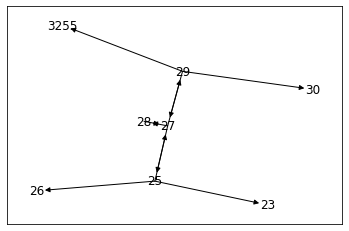

In [12]:
# I had several problems with importing pygraphviz, so had to improvise a little bit!!

from networkx.drawing.nx_agraph import graphviz_layout, write_dot
import matplotlib.pyplot as plt

addEdges = generate_edges(graph)
data = nx.DiGraph()
data.add_edges_from(addEdges)
position = nx.spring_layout(data)
nx.draw_networkx_labels(data,position)
nx.draw_networkx_edges(data,position)
plt.show()


* Now try getting the first 200 Node IDs from roadNet-CA.txt and once again create a Directed Graph. And again Nodes that do not have a neighbour set these as cornors.

In [13]:
list_of_200 = []
with open(fileName,"r") as f:
    for i in range(204):
        line = f.readline()
        stripped_line = line.strip()
        line_list = stripped_line.split()
        list_of_200.append(line_list)
        

del list_of_200[:4]
print(list_of_200[:10])

[['0', '1'], ['0', '2'], ['0', '469'], ['1', '0'], ['1', '6'], ['1', '385'], ['2', '0'], ['2', '3'], ['469', '0'], ['469', '380']]


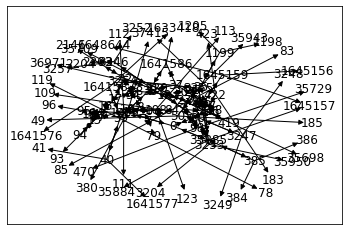

In [14]:
data2 = nx.DiGraph()
data2.add_edges_from(list_of_200)
position2 = nx.spring_layout(data2)
nx.draw_networkx_labels(data2,position2)
nx.draw_networkx_edges(data2,position2)
plt.show()